In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np

# Define a transform to convert images to PyTorch tensors
transform = transforms.Compose([
    transforms.ToTensor(),
    # You can add other transforms like normalization here if needed, for example:
    # transforms.Normalize((0.1307,), (0.3081,))
])

# Download and create train and test datasets
train_dataset = datasets.MNIST(
    root='mnist_data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='mnist_data',
    train=False,
    transform=transform,
    download=True
)

# Create data loaders for training and testing
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False
)

# Example: iterate through a single batch of data
images, labels = next(iter(train_loader))
print(f"Image batch shape: {images.size()}")
print(f"Labels batch shape: {labels.size()}")


100.0%
100.0%
100.0%
100.0%

Image batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


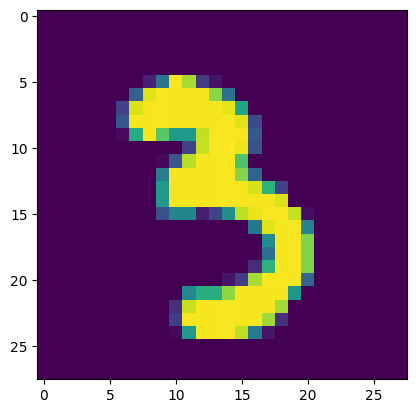

In [7]:
import matplotlib.pyplot as plt
plt.imshow(images[1].reshape(28, 28, 1))

In [20]:
# Save image, then load and make sure the data type/distribution stays the same
img = images[1].reshape(28, 28, 1)
torch.save(img, 'three.pt')

In [4]:
device = "mps"
class NeuralNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten()
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512),
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

model = NeuralNetwork().to(device)
print(model)



NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def train(dataloader, model, loss_fn, optimizer):
  size = len(dataloader.dataset)
  model.train()
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)

    pred = model(X)
    loss = loss_fn(pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    if batch % 100 == 0:
      loss, current = loss.item(), (batch + 1) * len(X)
      print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [9]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300709  [   64/60000]
loss: 2.287632  [ 6464/60000]
loss: 2.299720  [12864/60000]
loss: 2.301715  [19264/60000]
loss: 2.270795  [25664/60000]
loss: 2.288174  [32064/60000]
loss: 2.273882  [38464/60000]
loss: 2.263458  [44864/60000]
loss: 2.265608  [51264/60000]
loss: 2.270803  [57664/60000]
Test Error: 
 Accuracy: 40.8%, Avg loss: 2.256516 

Epoch 2
-------------------------------
loss: 2.260157  [   64/60000]
loss: 2.249036  [ 6464/60000]
loss: 2.239356  [12864/60000]
loss: 2.240987  [19264/60000]
loss: 2.233018  [25664/60000]
loss: 2.233599  [32064/60000]
loss: 2.212435  [38464/60000]
loss: 2.213171  [44864/60000]
loss: 2.219995  [51264/60000]
loss: 2.195962  [57664/60000]
Test Error: 
 Accuracy: 55.8%, Avg loss: 2.192352 

Epoch 3
-------------------------------
loss: 2.212326  [   64/60000]
loss: 2.197248  [ 6464/60000]
loss: 2.157324  [12864/60000]
loss: 2.171942  [19264/60000]
loss: 2.155426  [25664/60000]
loss: 2.115762  [32064/600

In [10]:
#more epochs
epochs = 15
for t in range(epochs):
    print(f"Epoch {t+6}\n-------------------------------")
    train(train_loader, model, loss_fn, optimizer)
    test(test_loader, model, loss_fn)
print("Done!")

Epoch 6
-------------------------------
loss: 1.656127  [   64/60000]
loss: 1.539479  [ 6464/60000]
loss: 1.512505  [12864/60000]
loss: 1.475462  [19264/60000]
loss: 1.522653  [25664/60000]
loss: 1.458982  [32064/60000]
loss: 1.426796  [38464/60000]
loss: 1.331863  [44864/60000]
loss: 1.359631  [51264/60000]
loss: 1.401915  [57664/60000]
Test Error: 
 Accuracy: 77.3%, Avg loss: 1.274492 

Epoch 7
-------------------------------
loss: 1.360435  [   64/60000]
loss: 1.411161  [ 6464/60000]
loss: 1.310790  [12864/60000]
loss: 1.209724  [19264/60000]
loss: 1.221130  [25664/60000]
loss: 1.203022  [32064/60000]
loss: 1.037735  [38464/60000]
loss: 1.003032  [44864/60000]
loss: 0.983368  [51264/60000]
loss: 0.931680  [57664/60000]
Test Error: 
 Accuracy: 80.8%, Avg loss: 1.017084 

Epoch 8
-------------------------------
loss: 1.066231  [   64/60000]
loss: 1.018382  [ 6464/60000]
loss: 1.006494  [12864/60000]
loss: 0.832059  [19264/60000]
loss: 0.934871  [25664/60000]
loss: 1.081175  [32064/600

In [13]:
def reset_model(model):
    for layer in model.children():
        if hasattr(layer, 'reset_parameters'):
            layer.reset_parameters()

# Use this function to reset your model
reset_model(model)

In [6]:
def train_until_target_loss(model, train_loader, optimizer, loss_fn, target_loss=0.2):
    model.train()
    epoch = 0
    loss_history = []
    while True:
        epoch += 1
        total_loss = 0
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)

            optimizer.zero_grad()
            pred = model(X)
            loss = loss_fn(pred, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch {epoch}, Loss: {avg_loss:.4f}")

        if avg_loss <= target_loss:
            print(f"Target loss reached after {epoch} epochs")
            break

    return loss_history


In [7]:
loss_history_1 = train_until_target_loss(model, train_loader, optimizer, loss_fn)
test(test_loader, model, loss_fn)

Epoch 1, Loss: 2.2780
Epoch 2, Loss: 2.2216
Epoch 3, Loss: 2.1324
Epoch 4, Loss: 1.9801
Epoch 5, Loss: 1.7363
Epoch 6, Loss: 1.4250
Epoch 7, Loss: 1.1377
Epoch 8, Loss: 0.9299
Epoch 9, Loss: 0.7905
Epoch 10, Loss: 0.6952
Epoch 11, Loss: 0.6279
Epoch 12, Loss: 0.5781
Epoch 13, Loss: 0.5399
Epoch 14, Loss: 0.5098
Epoch 15, Loss: 0.4854
Epoch 16, Loss: 0.4652
Epoch 17, Loss: 0.4482
Epoch 18, Loss: 0.4338
Epoch 19, Loss: 0.4212
Epoch 20, Loss: 0.4105
Epoch 21, Loss: 0.4006
Epoch 22, Loss: 0.3921
Epoch 23, Loss: 0.3842
Epoch 24, Loss: 0.3773
Epoch 25, Loss: 0.3710
Epoch 26, Loss: 0.3648
Epoch 27, Loss: 0.3592
Epoch 28, Loss: 0.3541
Epoch 29, Loss: 0.3492
Epoch 30, Loss: 0.3445
Epoch 31, Loss: 0.3405
Epoch 32, Loss: 0.3363
Epoch 33, Loss: 0.3326
Epoch 34, Loss: 0.3291
Epoch 35, Loss: 0.3253
Epoch 36, Loss: 0.3218
Epoch 37, Loss: 0.3187
Epoch 38, Loss: 0.3156
Epoch 39, Loss: 0.3125
Epoch 40, Loss: 0.3095
Epoch 41, Loss: 0.3068
Epoch 42, Loss: 0.3040
Epoch 43, Loss: 0.3014
Epoch 44, Loss: 0.29

In [14]:
reset_model(model)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_history_2 = train_until_target_loss(model, train_loader, optimizer, loss_fn, target_loss=0.05)

Epoch 1, Loss: 0.1778
Epoch 2, Loss: 0.0785
Epoch 3, Loss: 0.0546
Epoch 4, Loss: 0.0379
Target loss reached after 4 epochs


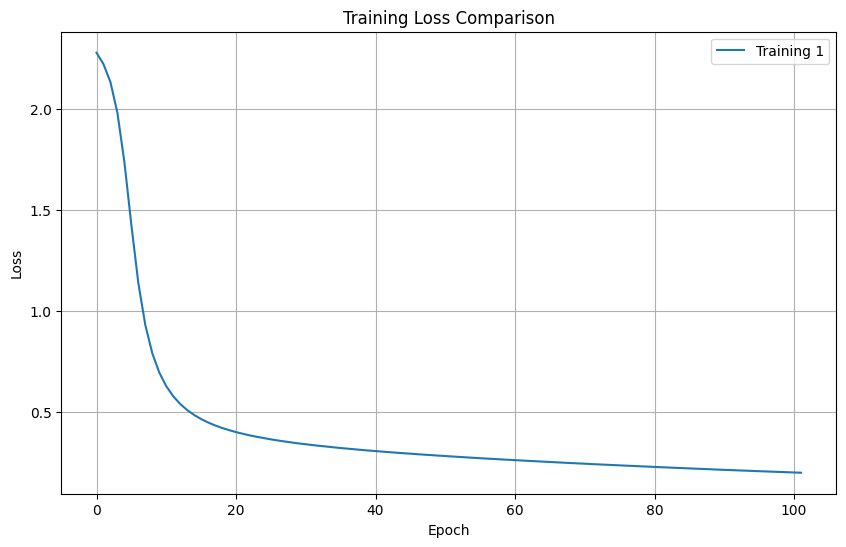

In [8]:
plt.figure(figsize=(10, 6))
#plt.plot(loss_history_1, label='Training 1')
plt.plot(loss_history_1, label='Training 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

model.eval()
x, y = test_dataset[0][0], test_dataset[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    # plt.imshow(x.reshape(28, 28), cmap='gray')
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

torch.Size([1, 28, 28])
Predicted: "7", Actual: "7"


In [21]:
torch.save(model.state_dict(), 'model_weights.pth')

torch.Size([1, 28, 28])


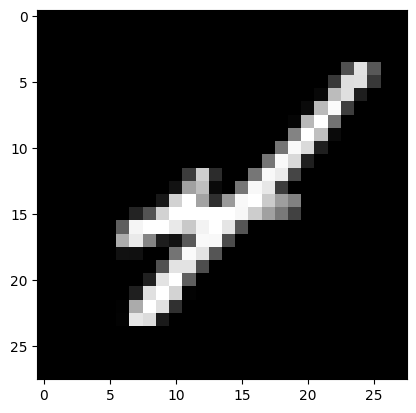

In [29]:
image = images[0].reshape(28, 28)

# Save the image using imsave
#plt.imsave("mnist_0.png", image, cmap='gray')
plt.imshow(image, cmap='gray')

<class 'numpy.ndarray'>


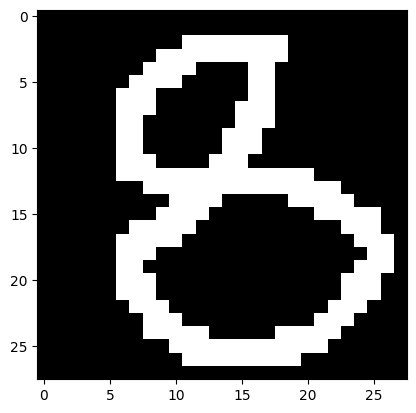

In [60]:
load_image = plt.imread('draw_8.png')
if load_image.shape[-1] in [3, 4]:  # RGB or RGBA
    load_image = np.mean(load_image[:, :, :3], axis=-1)  # Convert to grayscale by averaging RGB channels
elif load_image.shape[-1] == 1:  # Already grayscale
    mnist_draw = load_image[:, :, 0]


inv_load_image = 255 - load_image
plt.imshow(inv_load_image, cmap='gray')
print(type(inv_load_image))

In [61]:
load_tensor = torch.from_numpy(inv_load_image)
print(load_tensor.shape)

torch.Size([28, 28])


In [63]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

model.eval()
x = load_tensor.reshape(1, 28, 28)
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted = classes[pred[0].argmax(0)]
    print(f'Predicted: "{predicted}"')

Predicted: "2"
